# **Music-Genre Classification using KNN** (K-Nearest Neighbour) **Algorithm**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
Root = "/content/drive/MyDrive"
os.chdir(Root)

## [Dataset](https://https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification)


## **Introduction to libraries and modules used:**

**Pandas:** The `pandas` library is a popular open-source data manipulation and analysis library for the Python programming language. It provides data structures for efficiently storing and manipulating large datasets, as well as tools for working with structured data.

**NumPy:** `NumPy` (Numerical Python) is another fundamental library in the Python ecosystem, and it is primarily focused on numerical operations and efficient manipulation of large arrays and matrices.

**IPython.display:** The `IPython.display` module provides a set of functions for displaying rich content in the Jupyter Notebook and other IPython interactive environments. It's part of the IPython interactive computing ecosystem and is often used to enhance the display of output in Jupyter notebooks.

**Librosa:** `Librosa` is a Python package for music and audio analysis. It provides tools for various tasks related to audio processing and feature extraction, making it a valuable library for tasks such as music information retrieval, audio classification, and signal processing.

**Matplotlib:** `Matplotlib` is a popular Python library for creating static, animated, and interactive visualizations in Python.

In [ ]:
import pandas as pd
import numpy as np
import os
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

Accessing the directory and metadata of music files.

In [ ]:
audio_dataset_path= '/content/drive/MyDrive/Data/genres_original'
metadata=pd.read_csv('/content/drive/MyDrive/Data/features_30_sec.csv')
metadata.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


[0.00341797 0.00430298 0.00137329 0.00128174 0.00177002]
22050


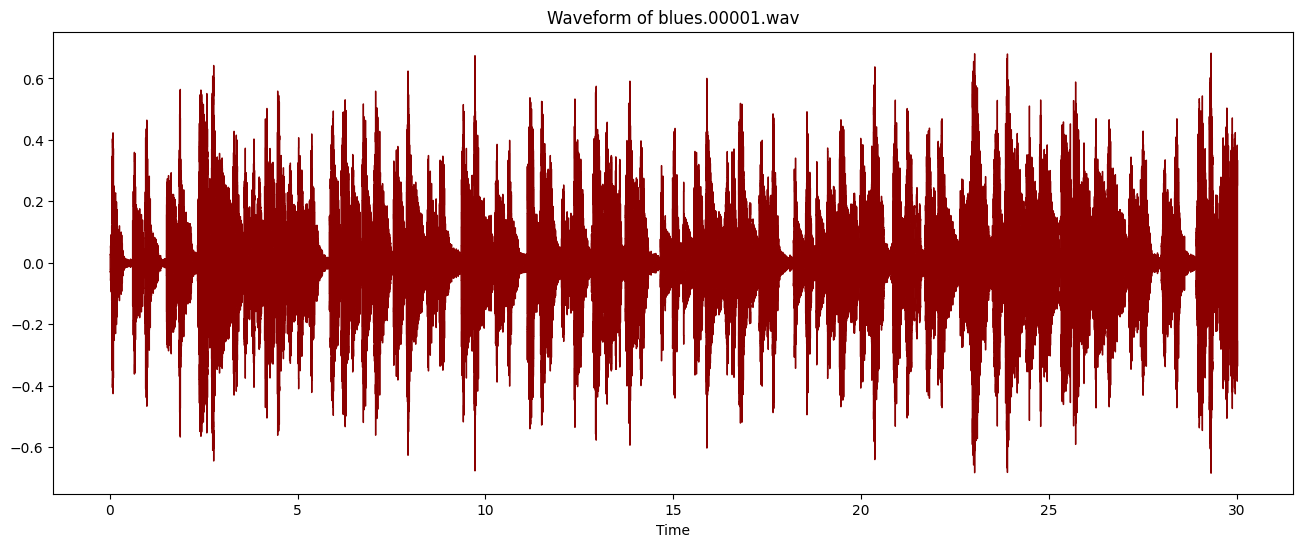

In [ ]:
sound, sample_rate = librosa.load(f'/content/drive/MyDrive/Data/genres_original/blues/blues.00001.wav')
print(sound[:5])
print(sample_rate)

plt.figure(figsize=(16, 6))
librosa.display.waveshow(y=sound, sr=sample_rate, color="darkred")
plt.title("Waveform of blues.00001.wav", fontsize=12)
plt.show()

In [ ]:
pd.set_option('display.max_columns', 60)
df = pd.read_csv(f'/content/drive/MyDrive/Data/features_30_sec.csv')
df.head()
print(df.shape)
print(df.info())

(1000, 60)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean  

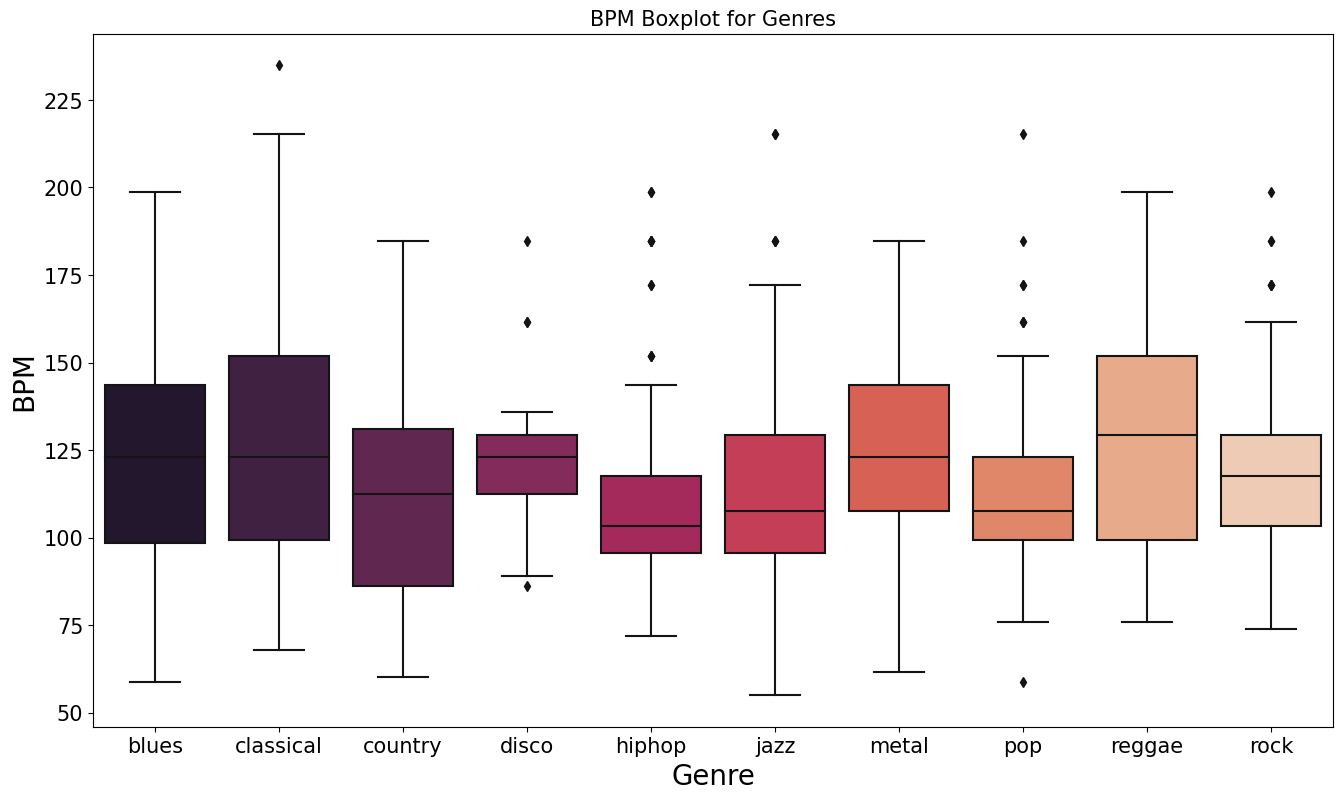

In [ ]:
import seaborn as sns
label_tempo_df= df[['label', 'tempo']]

f, ax = plt.subplots(figsize = (16,9))
sns.boxplot(x = 'label', y = 'tempo', data = label_tempo_df, palette = 'rocket' )

plt.title('BPM Boxplot for Genres', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Genre', fontsize = 20)
plt.ylabel('BPM', fontsize = 20)
plt.show()

##**Feature Extractor Function**

`Mel Frequency Cepstral Coefficients:`

These are state-of-the-art features used in automatic speech and speech recognition studies. There are set of steps for generation of these features:

Since the audio signals are constantly changing, first we divide these signals into smaller frames. Each frame is around 20-40 ms long. Then we try to identify different frequencies present in each frame. Now, separate linguistic frequencies from the noise To discard the noise, it then takes discrete cosine transform (DCT) of these frequencies. Using DCT we keep only a specific sequence of frequencies that have a high probability of information.


Creating a function to extract mfccs scaled features.

In [ ]:
def features_extractor(file):

    ### Loading file_names and it will return audio and sample rate
    ### Librosa will normalize data and return sample rate between 0 to 1.
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')


    ### Loading mfccs features using librosa.feature and limiting the number of features upto 40.
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)


    ### Calculating the mean of all mfccs features, to make it scaled
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

##Appending label

In [ ]:
metadata.drop(labels=552, axis=0, inplace=True)
### Run only once, cause u wanna pop a label because it's corrupt

**tqdm:**
`tqdm` is a Python library that provides a fast, extensible progress bar for loops and other iterable computations.

In [ ]:
from tqdm import tqdm
### Now we iterate through every audio file and extract features
### using Mel Frequency Cepstral Coefficients

extracted_features=[]
### Iterating metadata row-wise.
for index_num,row in tqdm(metadata.iterrows()):
  try:
    final_class_labels=row["label"]
    file_name = os.path.join(os.path.abspath(audio_dataset_path), final_class_labels+'/',str(row["filename"]))
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])
  except Exception as e:
    print(f"Error:  {e}")
    continue

553it [05:01,  1.82it/s]<ipython-input-5-0aea28d45519>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
554it [05:02,  1.11it/s]

Error:  


999it [08:45,  1.90it/s]


In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-113.59882, 121.57067, -19.162262, 42.36394, ...",blues
1,"[-207.52383, 123.98514, 8.94702, 35.86715, 2.9...",blues
2,"[-90.757164, 140.44087, -29.084547, 31.686693,...",blues
3,"[-199.57513, 150.0861, 5.663404, 26.855282, 1....",blues
4,"[-160.35417, 126.20948, -35.581394, 22.139256,...",blues


In [ ]:
extracted_features_df['class'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
metal        100
pop          100
reggae       100
rock         100
jazz          98
Name: class, dtype: int64

##**Split the dataset into independent and dependent dataset**

In [ ]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
X.shape

(998, 40)

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
y.shape

(998, 10)

#**Train Test Split:**

###**TensorFlow:**

>`TensorFlow` is an open-source machine learning library developed by the Google Brain team. It is designed to facilitate the development and deployment of machine learning models, particularly deep learning models. TensorFlow provides a comprehensive set of tools and community resources for building and training various types of machine learning models, including neural networks.



###**sklearn:**
>`sklearn` is a popular open-source machine learning library for the Python programming language. It provides simple and efficient tools for data analysis and modeling, including various machine learning algorithms, data preprocessing, feature selection, and model evaluation.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train

array([[-1.04723763e+02,  8.77537155e+01, -3.32488594e+01, ...,
        -2.38248777e+00, -1.36347139e+00, -7.22123504e-01],
       [-2.59909851e+02,  1.23193169e+02, -6.39508581e+00, ...,
        -6.73697758e+00, -3.90829611e+00,  3.18117642e+00],
       [-1.15755066e+02,  6.70791245e+01,  1.88346851e+00, ...,
        -3.43661404e+00, -1.73870683e+00, -4.68738452e-02],
       ...,
       [-1.25020428e+01,  9.13173676e+01, -2.30759563e+01, ...,
        -4.04763985e+00, -1.77685583e+00, -1.75431299e+00],
       [-2.37930965e+01,  8.29835587e+01,  2.32049274e+00, ...,
         1.40550280e+00,  4.16220456e-01, -3.45980562e-02],
       [-9.63197021e+01,  9.09497147e+01, -3.22195396e+01, ...,
        -2.41483903e+00, -1.62698299e-01, -1.84749973e+00]], dtype=float32)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(798, 40)
(200, 40)
(798, 10)
(200, 10)


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


###**Keras:**
>`Keras` is an open-source high-level neural networks API written in Python and capable of running on top of popular deep learning libraries, including TensorFlow, Microsoft Cognitive Toolkit (CNTK), and Theano.

>`Sequential` in `keras.models` is a linear stack of neural network layers, simplifying the process of building, training, and deploying deep learning models in a sequential manner.

>`keras.layers` is a module in the Keras deep learning library that provides a collection of layer classes. These classes are used to construct neural networks by stacking various types of layers on top of each other.

>`keras.optimizers` is a module in the Keras deep learning library that provides a collection of optimizer classes. Optimizers are algorithms or methods used to adjust the parameters (weights and biases) of a neural network during training. They play a crucial role in minimizing the loss function and improving the model's performance.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
## No of classes
num_labels=y.shape[1]

In [ ]:
y.shape[1]

10

###Layering the model with multiple neural network layers

In [ ]:
model=Sequential()
model.add(Dense(1024,input_shape=(40,),activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.3))

###final layer
model.add(Dense(num_labels, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              41984     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               3

##Compiling the model

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)

##Training my model

In [ ]:

from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=f'saved_models/audio_classification_{current_time}.hdf5',verbose=1, save_best_only=True)
###This ModelCheckpoint will return the best suited model to checkpointer
start = datetime.now() #to calculate the initial time, before starting model training

history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)##display the total time used to train this model

Epoch 1/100
22/25 [=========================>....] - ETA: 0s - loss: 5.6574 - accuracy: 0.1236
Epoch 1: val_loss improved from inf to 2.27719, saving model to saved_models/audio_classification_03:44:50.hdf5
25/25 [==============================] - 3s 36ms/step - loss: 5.3835 - accuracy: 0.1216 - val_loss: 2.2772 - val_accuracy: 0.1550
Epoch 2/100
 1/25 [>.............................] - ETA: 0s - loss: 3.3844 - accuracy: 0.1250

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - ETA: 0s - loss: 2.7152 - accuracy: 0.1266
Epoch 2: val_loss improved from 2.27719 to 2.25338, saving model to saved_models/audio_classification_03:44:50.hdf5
25/25 [==============================] - 1s 31ms/step - loss: 2.7152 - accuracy: 0.1266 - val_loss: 2.2534 - val_accuracy: 0.1600
Epoch 3/100
25/25 [==============================] - ETA: 0s - loss: 2.4009 - accuracy: 0.1228
Epoch 3: val_loss improved from 2.25338 to 2.17099, saving model to saved_models/audio_classification_03:44:50.hdf5
25/25 [==============================] - 1s 29ms/step - loss: 2.4009 - accuracy: 0.1228 - val_loss: 2.1710 - val_accuracy: 0.2100
Epoch 4/100
25/25 [==============================] - ETA: 0s - loss: 2.3172 - accuracy: 0.1629
Epoch 4: val_loss improved from 2.17099 to 2.13080, saving model to saved_models/audio_classification_03:44:50.hdf5
25/25 [==============================] - 1s 28ms/step - loss: 2.3172 - accuracy: 0.1629 - val_loss: 2.1308 - val_accura

##Evaluating the loss and the accurcy of the model:
  `Output-> [loss,accuracy]`  

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

[1.6620843410491943, 0.5799999833106995]

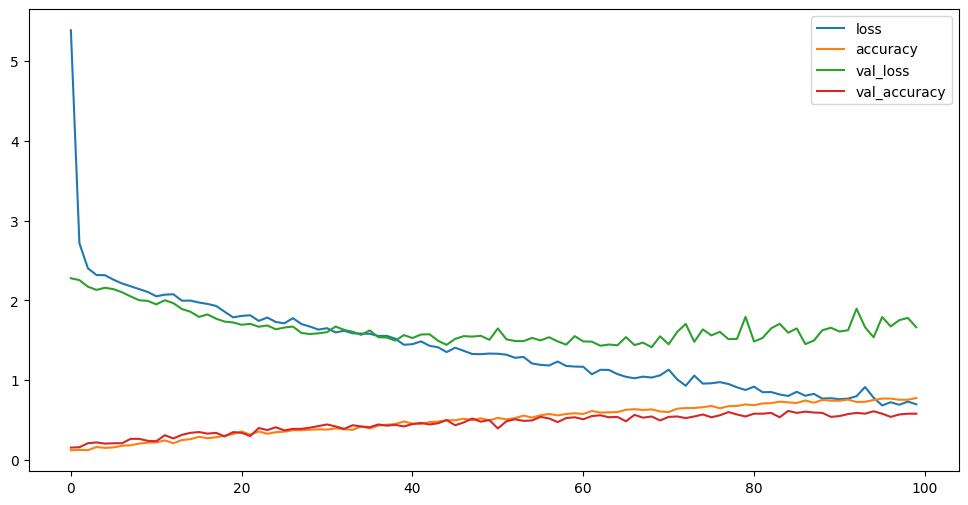

In [ ]:
pd.DataFrame(history.history).plot(figsize=(12,6))
plt.show()

In [ ]:
filename="/content/drive/MyDrive/audio/hiphop.00000.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_best')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
##predicted_label=model.predict_classes(mfccs_scaled_features)
predicted_probabilities = model.predict(mfccs_scaled_features)
predicted_label = np.argmax(predicted_probabilities, axis=1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

[-8.0934227e+01  8.4780525e+01 -3.1534628e+01  3.3901741e+01
 -1.9836761e+01  2.3553936e+01 -2.2136858e+01  2.0026501e+01
 -1.6764809e+01  1.9219479e+01 -1.3098828e+01  1.1502167e+01
 -1.0718429e+01  1.0579796e+01 -8.4207439e+00  7.3195724e+00
 -5.3723488e+00  7.6925149e+00 -5.5499210e+00  1.5127792e+00
 -4.6432471e+00  2.8168759e+00 -2.2038243e+00  1.8381641e+00
  4.9952337e-01  1.6207831e+00 -1.5888569e+00 -4.1720856e-02
  5.8735186e-01  1.3061397e+00  3.4303790e-01  1.4290801e+00
  1.7899964e+00  2.9582553e+00  2.0029953e+00 -4.2653573e-01
 -8.8033581e-01  6.4885810e-02  1.5727409e+00  1.7429556e+00]
[[-8.0934227e+01  8.4780525e+01 -3.1534628e+01  3.3901741e+01
  -1.9836761e+01  2.3553936e+01 -2.2136858e+01  2.0026501e+01
  -1.6764809e+01  1.9219479e+01 -1.3098828e+01  1.1502167e+01
  -1.0718429e+01  1.0579796e+01 -8.4207439e+00  7.3195724e+00
  -5.3723488e+00  7.6925149e+00 -5.5499210e+00  1.5127792e+00
  -4.6432471e+00  2.8168759e+00 -2.2038243e+00  1.8381641e+00
   4.9952337e-01 

array(['hiphop'], dtype='<U9')